In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import argparse

from utils import *

opt:  Namespace(isTrain=True, model_dir='./output/ep10_bs32', data_dir='./TrainingData/dataset_700Mpc_250', file_id='cylindrical_power', n_feature=3, input_dim=7, output_dim=10, idata_start=0, ndata=360, n_noise=100, model='CNN', hidden_dim=32, n_layer=3, r_drop=0.2, batch_size=32, epoch=10, epoch_decay=0, lr=0.001, loss='nllloss')
ConvNet(
  (blocks): ModuleList(
    (0): ConvBlock(
      (conv): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (drop): Dropout(p=0, inplace=False)
      (act): LeakyReLU(negative_slope=0.01)
    )
    (1): ConvBlock(
      (conv): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (drop): Dropout(p=0.2, inplace=False)
      (act): LeakyReLU(negative_slope=0.01)
    )
    (2): ConvBlock(
      (conv): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
      (drop): Dropout(p=0.2, inplace=False)
      (act): LeakyReLU(negative_slope=0.01)
    )
  )
  (linear): Linear(in_features=128, out_features=

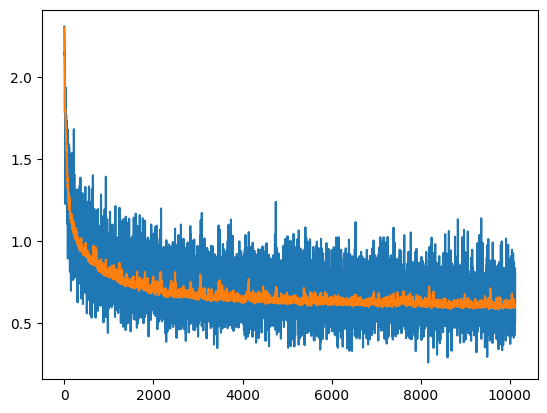

In [3]:
model_dir = "./output/ep10_bs32"

### Plot loss
loss = np.loadtxt(f"{model_dir}/log.txt")
plt.figure()
plt.plot(loss[:,0], loss[:,1], label="train")
plt.plot(loss[:,0], loss[:,2], label="val")

### Load arguments
with open(f"{model_dir}/args.json", "r") as f:
    opt = json.load(f, object_hook=lambda d: argparse.Namespace(**d))
print("opt: ", opt)

### Load model
from model import MyModel, ConvNet
model = MyModel(opt)
print(model)

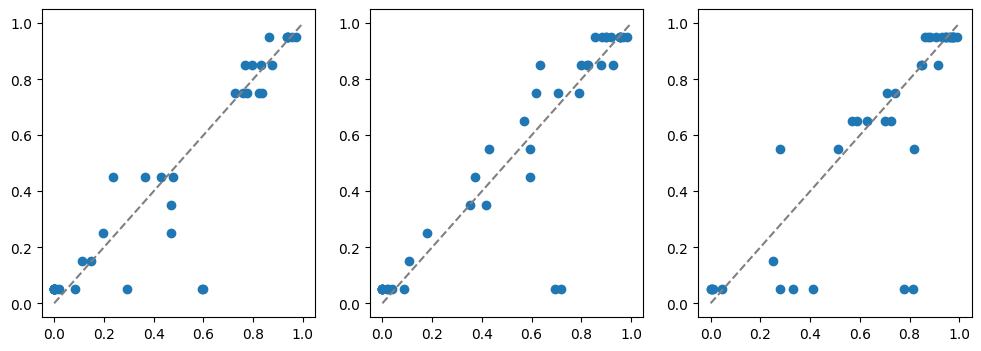

In [4]:
istart = 360 
if opt.loss == "nllloss":
    true = []
    pred = []
    for i in range(40):
        data_id = i + istart

        filename = f"{model_dir}/test_{opt.file_id}_{data_id}.txt"
        with open(filename, "r") as file:
            first_line = file.readline().strip()  

        tmp = first_line.split()[1:]
        true.append([float(x) for x in tmp])

        tmp = np.loadtxt(filename, skiprows=1)
        pred.append( ( np.argmax(tmp, axis=0) + 0.5) / opt.output_dim )

    true = np.array(true)
    pred = np.array(pred)
    plt.figure(figsize=(12,4))
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.scatter(true[:,i], pred[:,i])

        plt.plot([0,1], [0,1], ls="--", color="gray")
else:
    test = np.loadtxt(f"{model_dir}/test.txt")
    plt.figure(figsize=(12,4))
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.scatter(test[:,2*i], test[:,2*i+1])

        plt.plot([0,1], [0,1], ls="--", color="gray")

# No normalization


/tmp/ipykernel_1380652/928830983.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16,2))


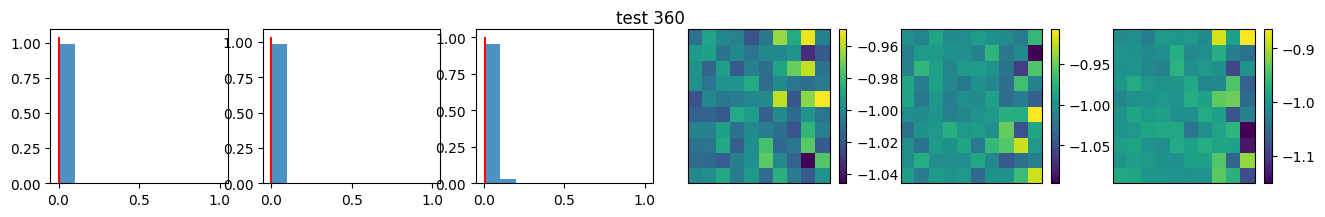

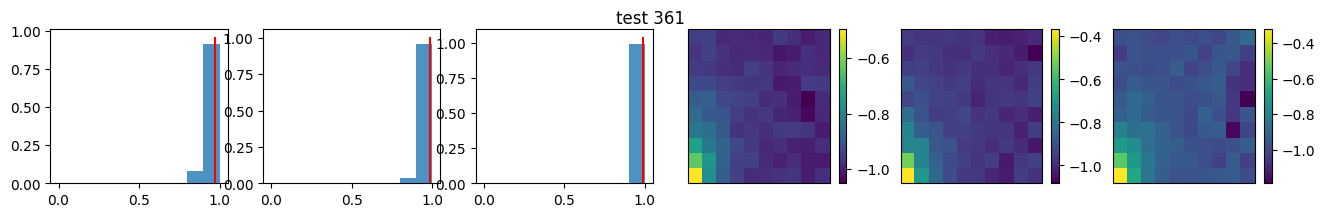

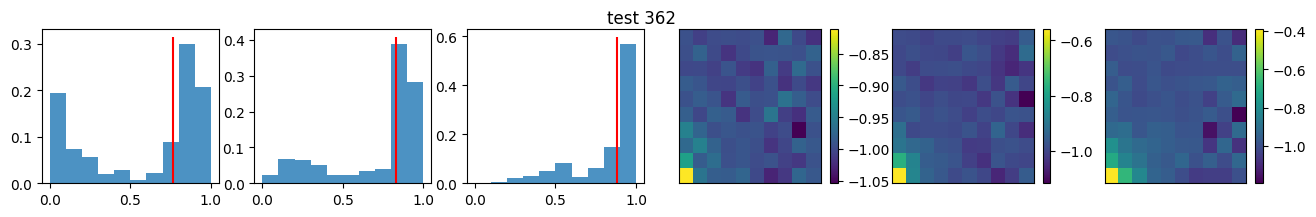

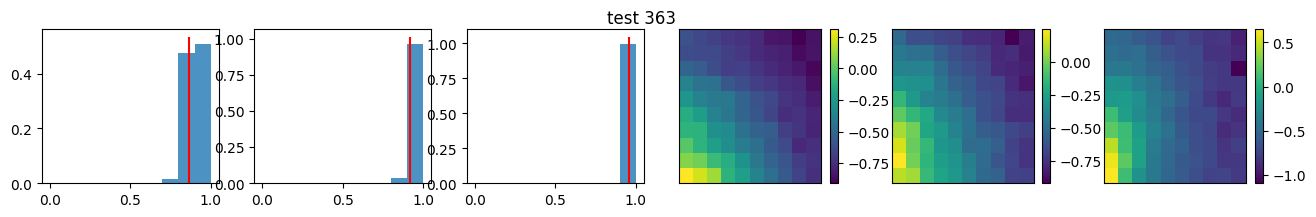

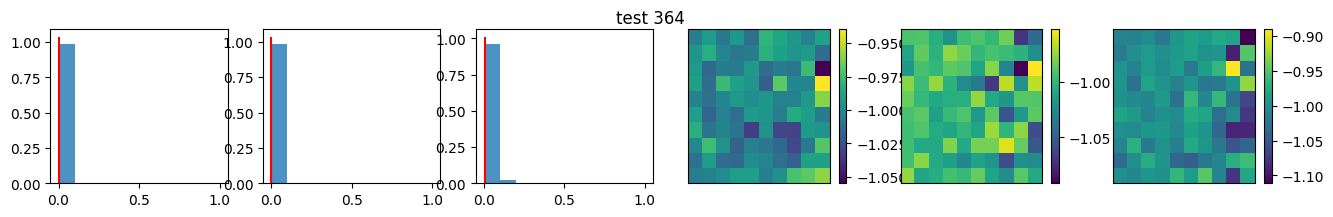

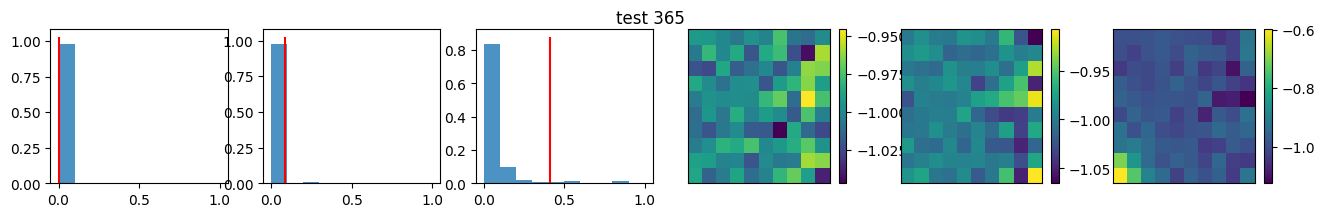

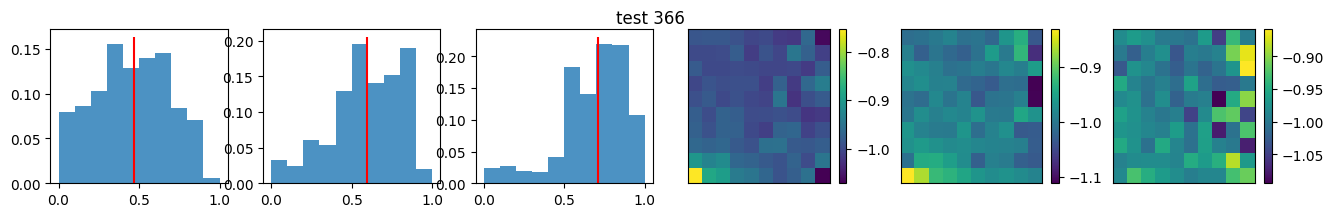

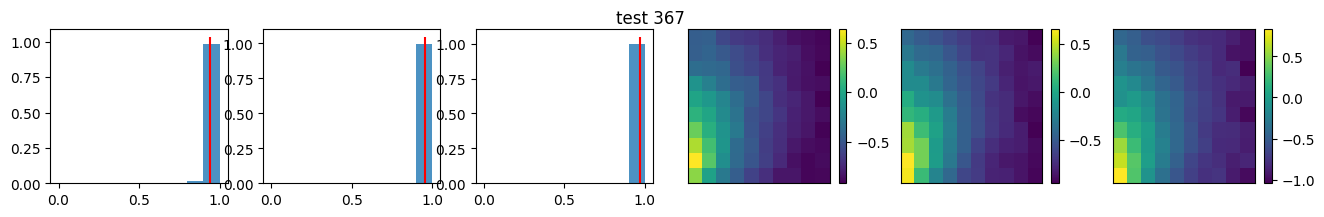

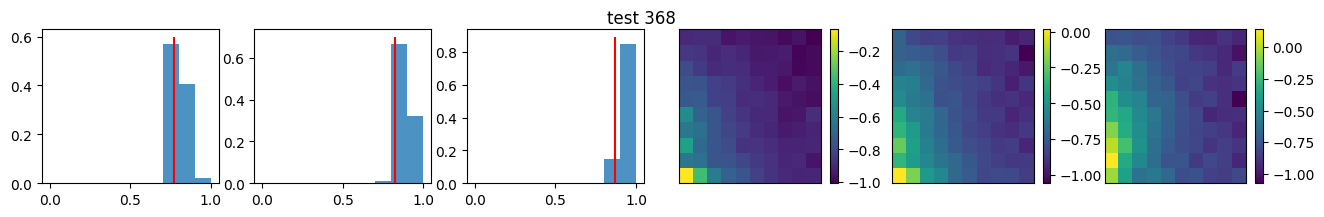

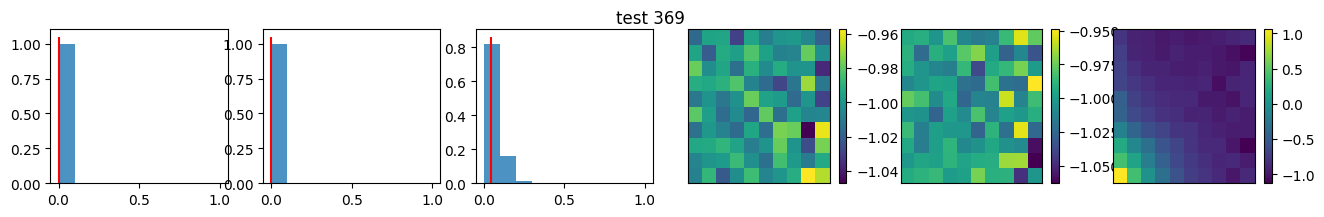

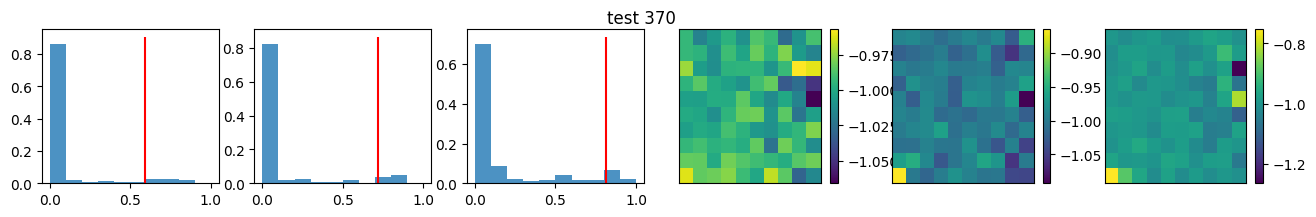

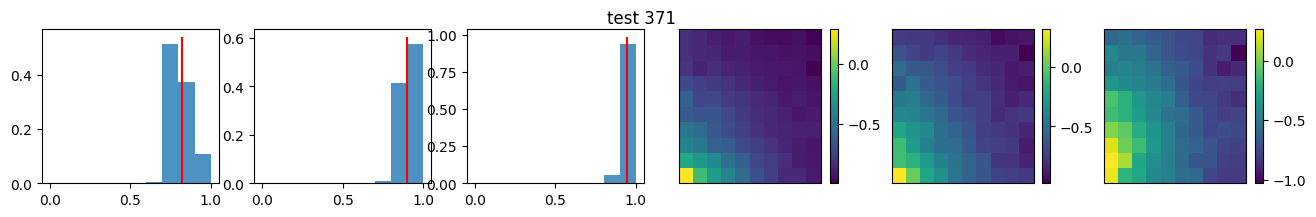

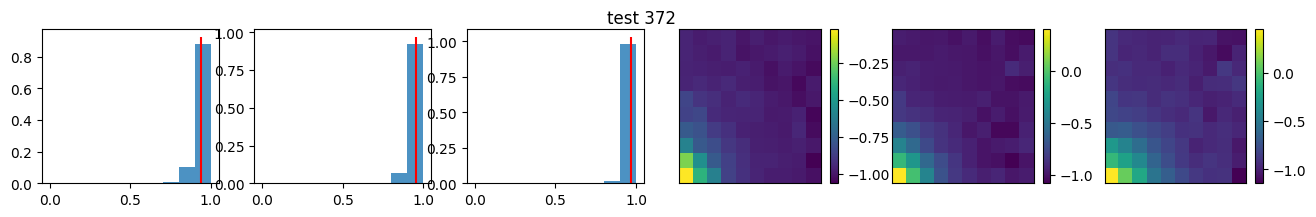

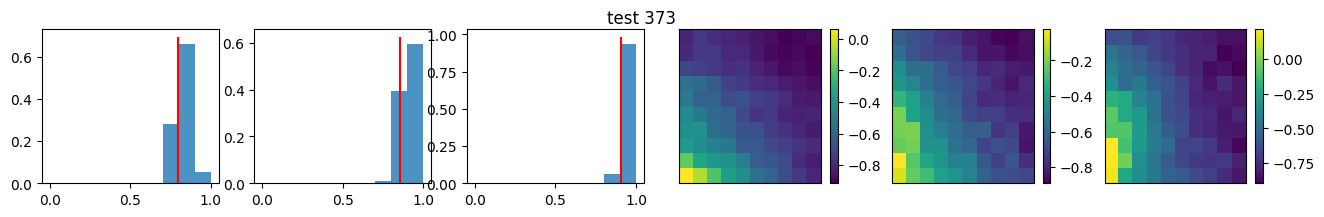

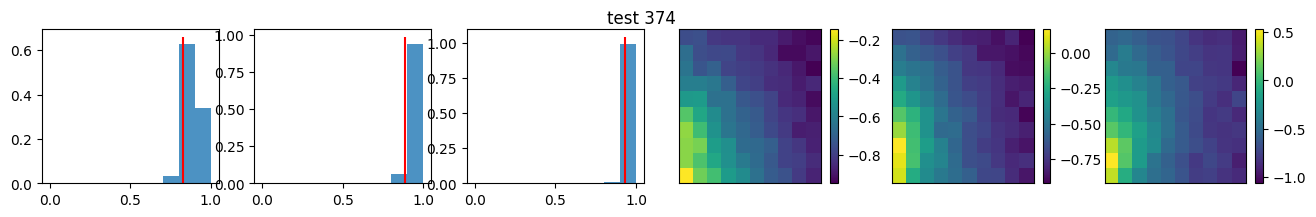

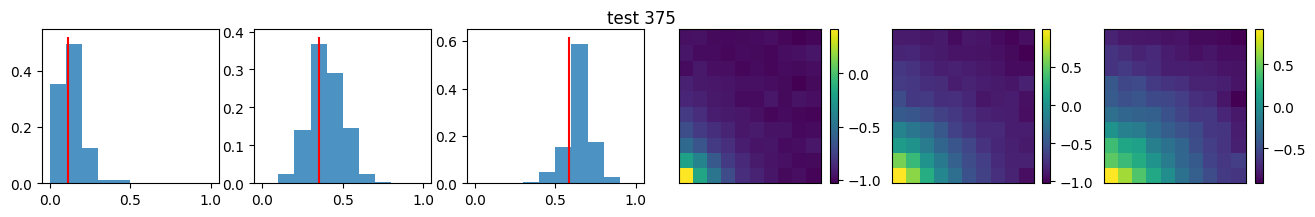

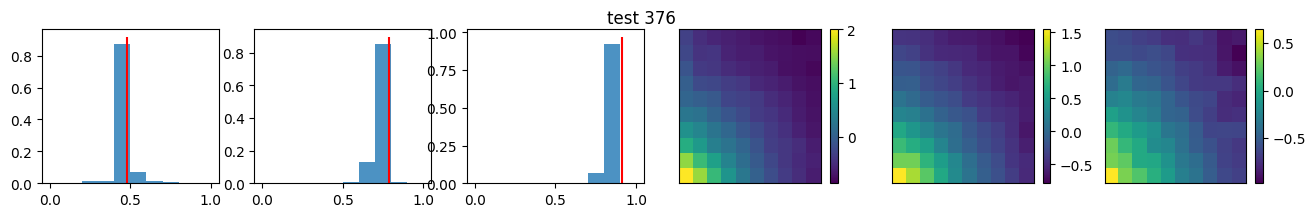

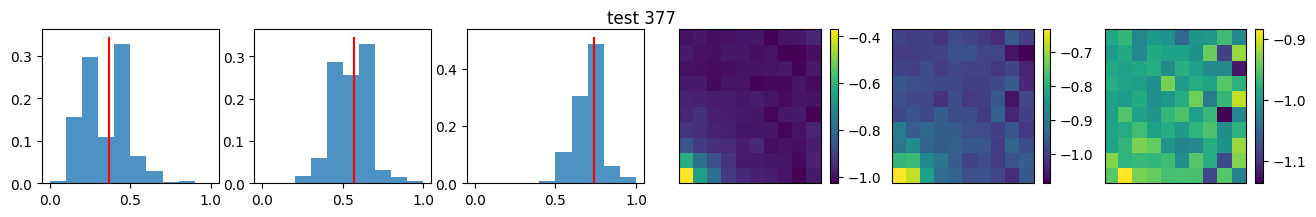

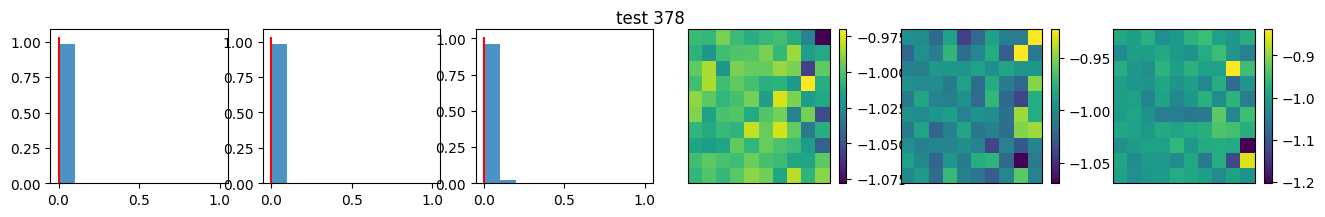

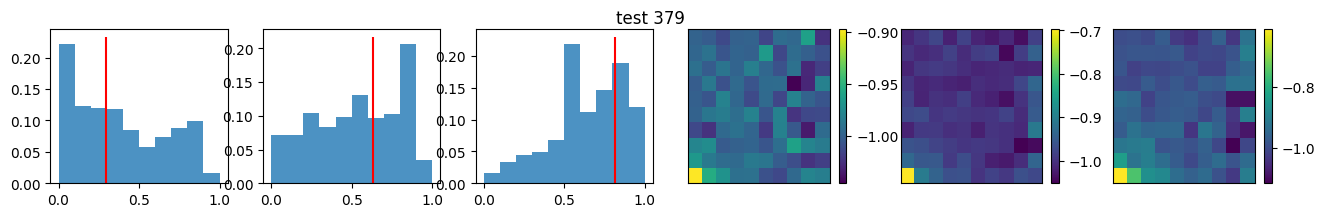

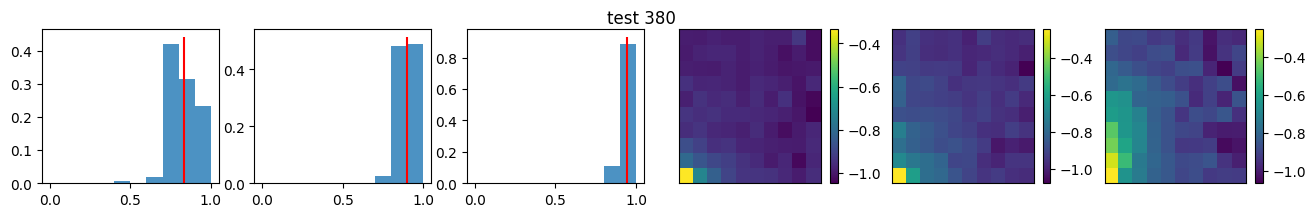

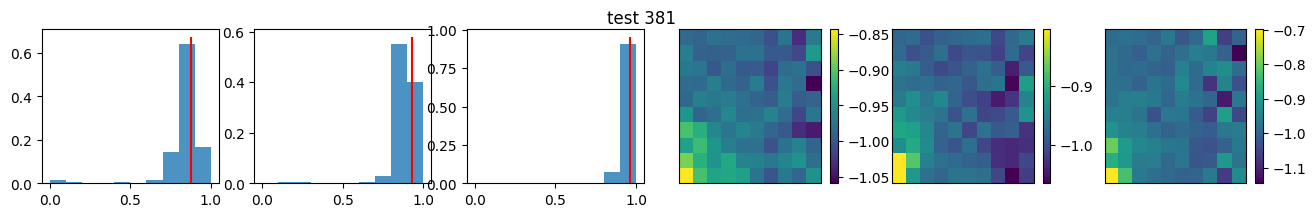

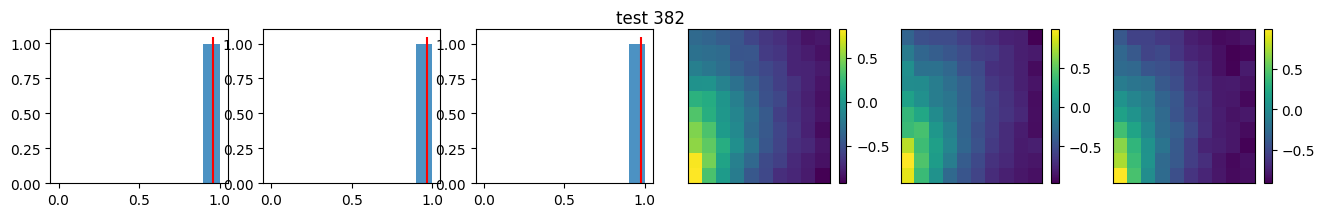

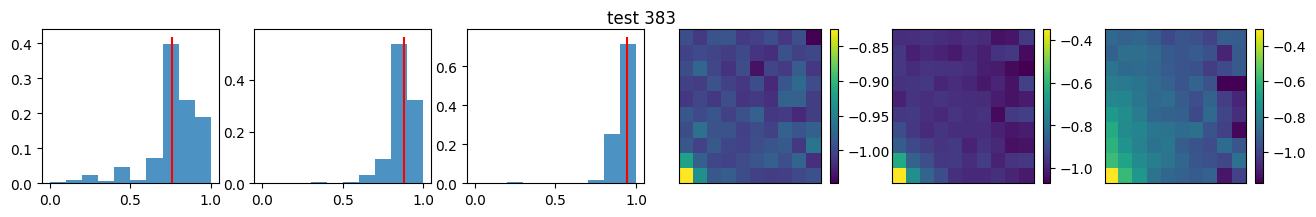

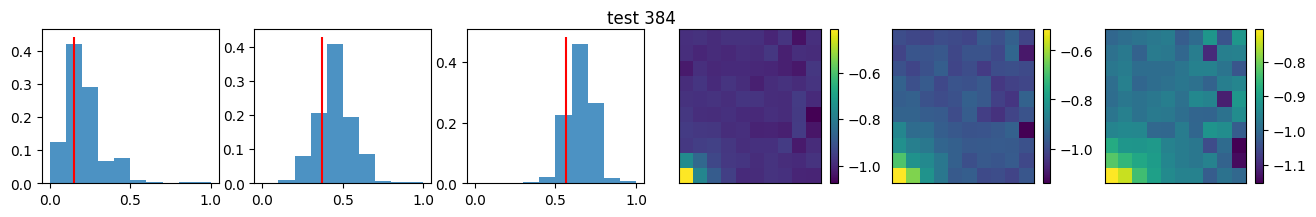

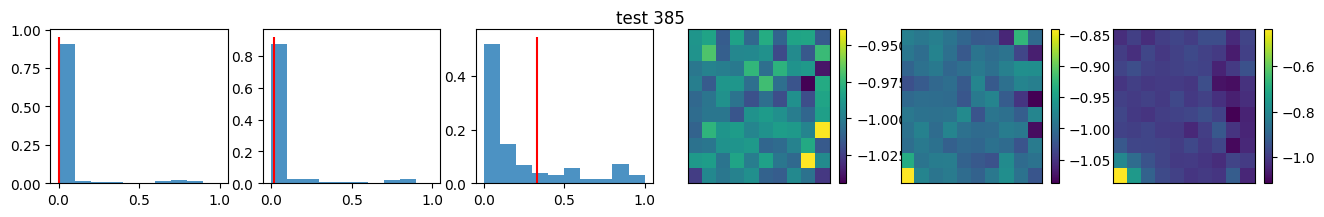

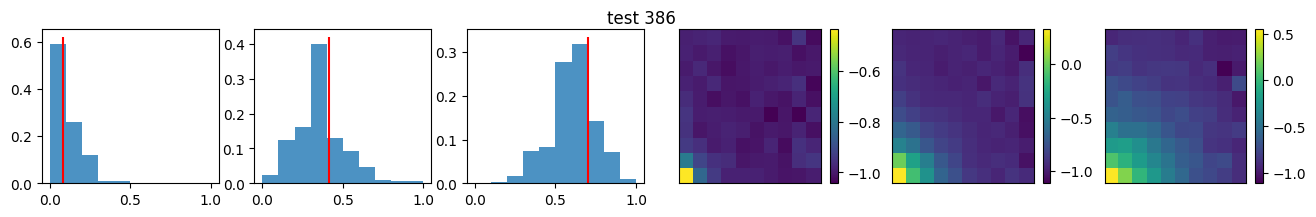

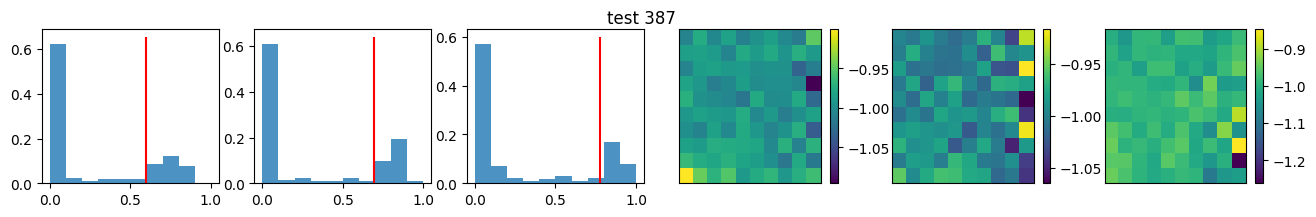

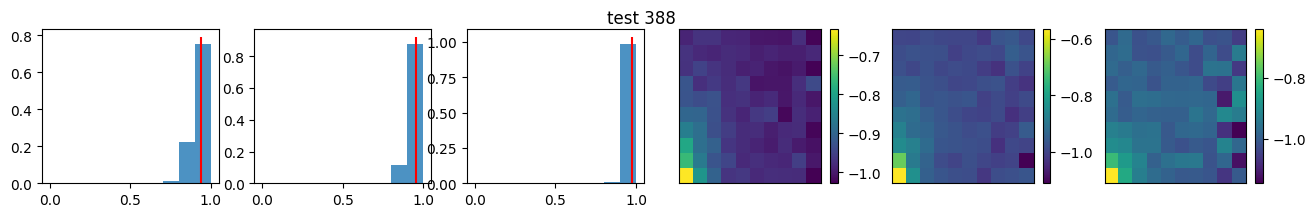

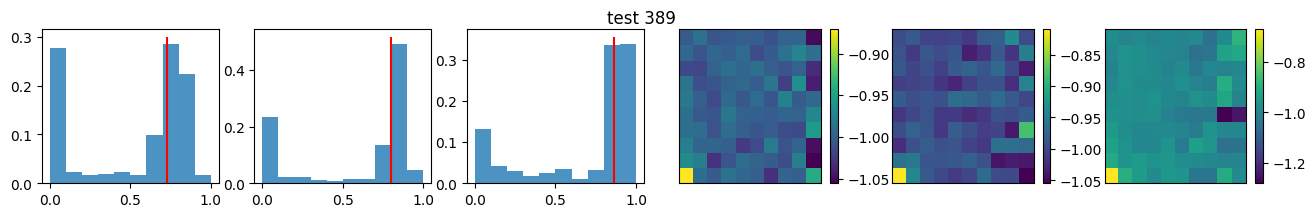

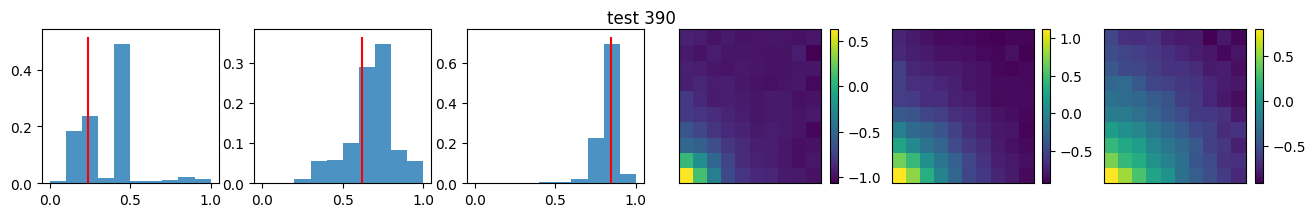

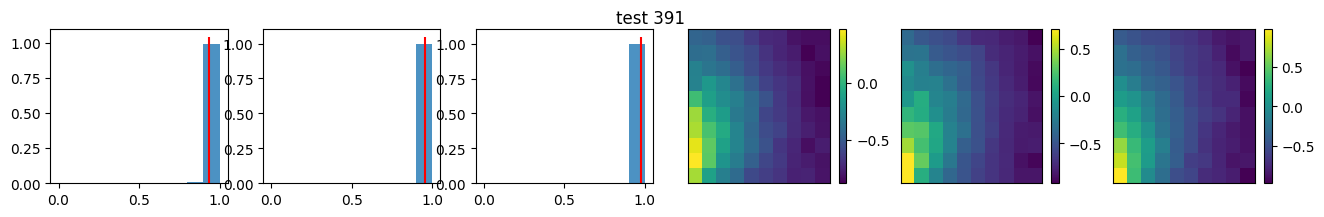

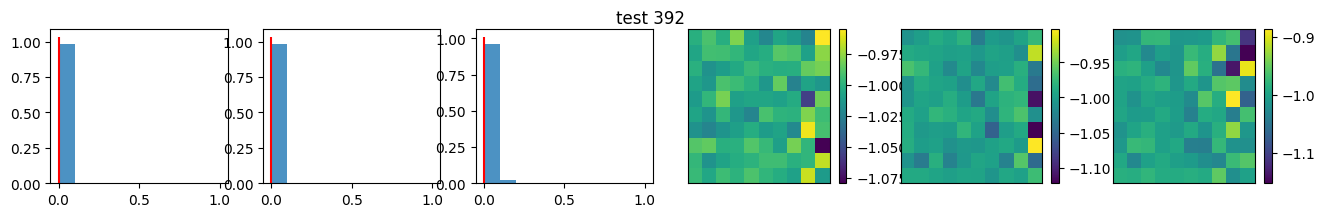

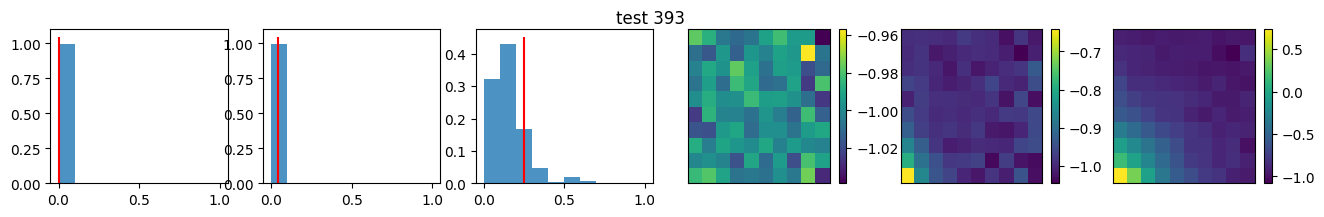

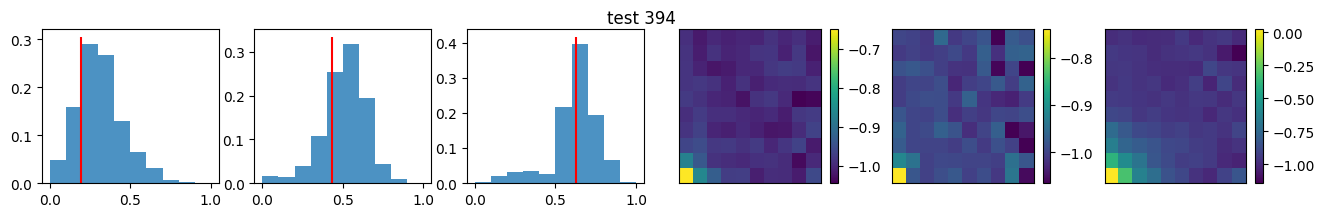

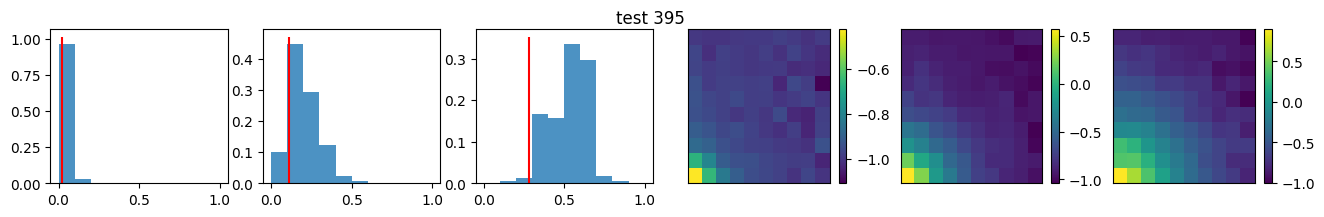

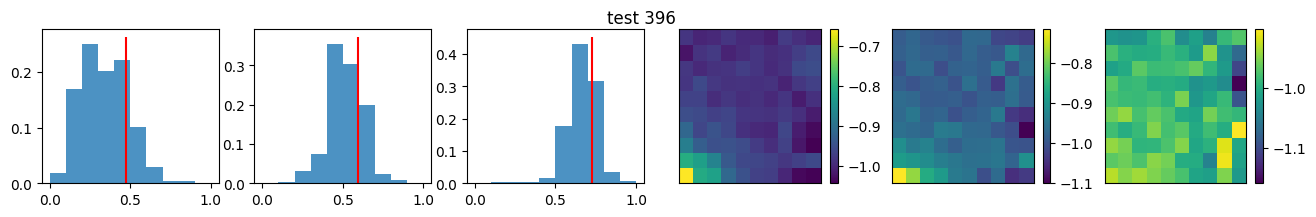

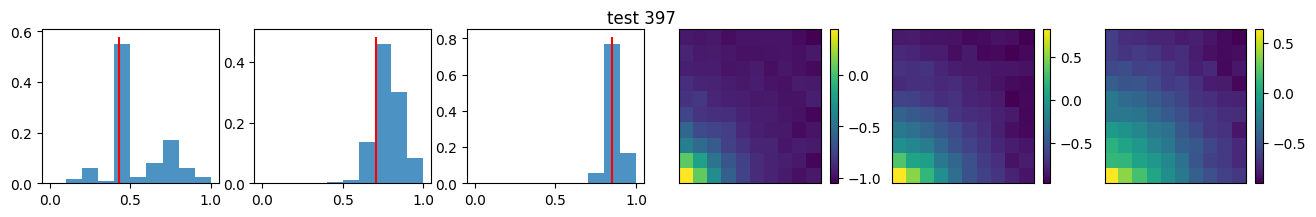

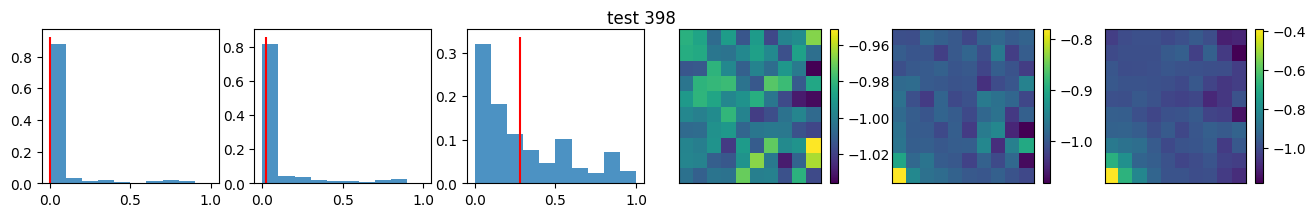

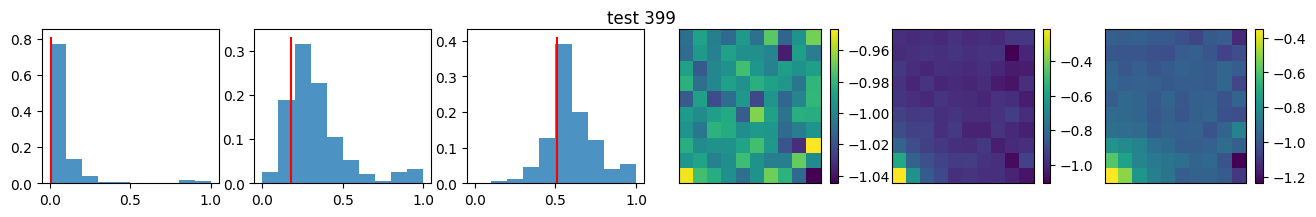

In [6]:
istart = 360
ndata = 40

data, label, _, _= load_SDC3b_data(opt.data_dir, file_id=opt.file_id, istart=istart, ndata=ndata, add_noise=True)
data_npy = data.detach().numpy()

for idata in range(ndata):
    data_id = istart + idata
    filename = f"{model_dir}/test_{opt.file_id}_{data_id}.txt"

    with open(filename, "r") as file:
        first_line = file.readline().strip()  

    true = first_line.split()[1:]
    true = [float(t) for t in true]
    test = np.loadtxt(filename)

    plt.figure(figsize=(16,2))
    plt.suptitle(f"test {data_id}")
    for i in range(3):
        plt.subplot(1,6,i+1)

        x = np.linspace(0.5,opt.output_dim-0.5,opt.output_dim)
        x = x / opt.output_dim
        plt.bar(x, np.exp(test[:,i]), width=x[1]-x[0], align="center", alpha=0.8)
        ylim = plt.ylim()
        plt.vlines(true[i], 0, ylim[1], color="red")

    for i in range(3):
        ax = plt.subplot(1,6,i+4)
        im = ax.pcolor(data_npy[idata, i])
        ax.set_xticks([])
        ax.set_yticks([])
        plt.colorbar(im, ax=ax)

        


# Warning: setting ndata > 1 for PS1_PS2_Data. Use ndata = 1.
# No normalization
# Warning: setting ndata > 1 for PS1_PS2_Data. Use ndata = 1.
# No normalization


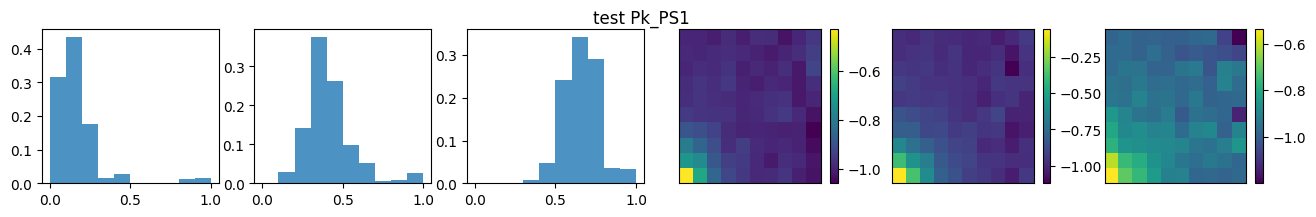

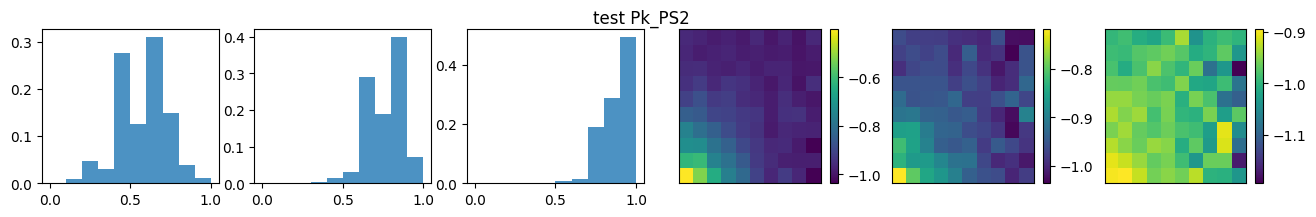

In [9]:
data_dir = "./PS1_PS2_Data"

for file_id in ["Pk_PS1", "Pk_PS2"]:
    data, label, _, _= load_SDC3b_data(data_dir, file_id=file_id)
    data_npy = data.detach().numpy()

    data_id = 0
    filename = f"{model_dir}/test_{file_id}_{data_id}.txt"

    with open(filename, "r") as file:
        first_line = file.readline().strip()  

    true = first_line.split()[1:]
    true = [float(t) for t in true]
    test = np.loadtxt(filename)

    plt.figure(figsize=(16,2))
    plt.suptitle(f"test {file_id}")
    for i in range(3):
        plt.subplot(1,6,i+1)

        x = np.linspace(0.5,opt.output_dim-0.5,opt.output_dim)
        x = x / opt.output_dim
        plt.bar(x, np.exp(test[:,i]), width=x[1]-x[0], align="center", alpha=0.8)
        
    for i in range(3):
        ax = plt.subplot(1,6,i+4)
        im = ax.pcolor(data_npy[0, i])
        ax.set_xticks([])
        ax.set_yticks([])
        plt.colorbar(im, ax=ax)